In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
spam_df = pd.read_csv('/Users/ayhancagan/Desktop/Spam Classifier Using Naive Bayes/emails.csv')

In [24]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [25]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [26]:
spam_df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [27]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [28]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


VISUALIZE DATASET


In [40]:
# Let's see which message is the most popular ham/spam message
spam_df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: * special notification * aurora versi...    2
1     1368   1368  Subject: naturally irresistible your corporate...    1

In [41]:
# Let's get the length of the messages
spam_df['length'] = spam_df['text'].apply(len)
spam_df.head()


,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [42]:
spam_df

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


<Axes: ylabel='Frequency'>

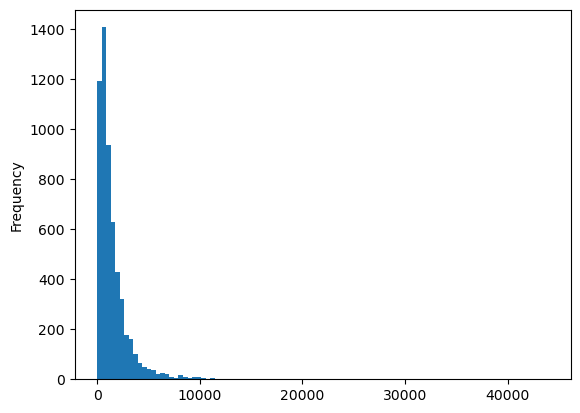

In [43]:
spam_df['length'].plot(bins=100, kind='hist')

In [29]:
ham = spam_df[spam_df['spam']== 0]

spam_df['spam']== 0: Bu ifade, 'spam' adlı bir sütunu içeren spam_df DataFrame'indeki değerleri kontrol eder. spam sütunu genellikle bir e-postanın spam olup olmadığını belirten bir etiket içerir. Burada, == 0 koşulu, 'spam' sütunundaki değerlerin sıfıra eşit olup olmadığını kontrol eder. Eğer bir değer sıfıra eşitse, bu durum "spam değil" anlamına gelir.
spam_df[spam_df['spam']== 0]: Bu ifade, önceki adımda belirlenen koşulu sağlayan satırları içeren bir DataFrame'i seçer. Yani, 'spam' sütunu içindeki değeri sıfıra eşit olan satırları seçer ve bu satırları içeren yeni bir DataFrame oluşturur. Bu DataFrame, 'spam' sütunu değeri 0 olan (spam olmayan) verilere karşılık gelir.

In [30]:
ham


,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [44]:
spam_df.length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [45]:
# Let's see the longest message 43952
spam_df[spam_df['length'] == 43952]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

In [31]:
spam = spam_df[spam_df['spam']== 1]

In [32]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [33]:
print('spam Percantage =',(len(spam)/len(spam_df))*100,'%')

spam Percantage = 23.88268156424581 %


In [34]:
print('Ham Percantage =',(len(ham)/len(spam_df))*100,'%')

Ham Percantage = 76.11731843575419 %


<Axes: ylabel='count'>

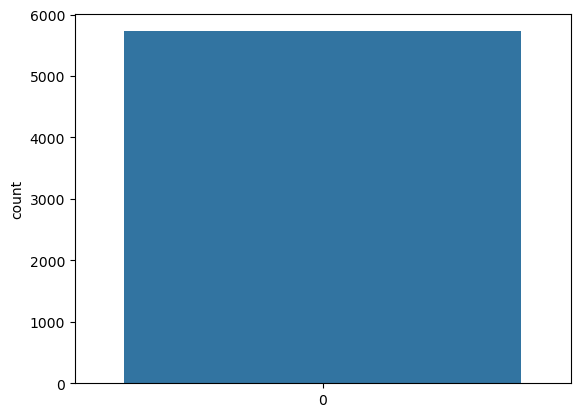

In [47]:
sns.countplot(spam_df['spam'], label = "Count") 

#CREATE TESTING AND TRAINING DATASET/DATA CLEANING

EXERCISE: REMOVE PUNCTUATION

In [48]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
Test = 'Hello Mr. Future, I am so happy to be learning AI now!!'

In [50]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [51]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

EXERCISE: REMOVE STOPWORDS

In [52]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
Test_punc_removed_join

'Hello Mr Future I am so happy to be learning AI now'

In [56]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [57]:
Test_punc_removed_join_clean

['Hello', 'Mr', 'Future', 'happy', 'learning', 'AI']

 COUNT VECTORIZER EXAMPLE 

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

# CountVectorizer sınıfından bir örnek oluştur
vectorizer = CountVectorizer()

# Metin verisini sayısal bir matrise dönüştür
X = vectorizer.fit_transform(sample_data)



In [59]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [61]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


LET'S APPLY COUNT VECTORIZER TO OUR MESSAGES LIST

In [64]:
def message_cleaning(message):
    # 1. Punctuation removal: Noktalama işaretlerini kaldır
    Test_punc_removed = [char for char in message if char not in string.punctuation]

    # 2. Join the characters: Karakterleri birleştir
    Test_punc_removed_join = ''.join(Test_punc_removed)

    # 3. Remove stopwords: Stopwords'leri (anlamsız kelimeler) kaldır
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

    # Temizlenmiş metni döndür
    return Test_punc_removed_join_clean

In [67]:
spam_df_clean = spam_df['text'].apply(message_cleaning)

In [68]:
print(spam_df_clean[0])

['Subject', 'naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 

In [69]:
print(spam_df['text'][0])

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

LET'S APPLY COUNT VECTORIZER TO OUR MESSAGES LIST

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

# Önceki temizleme işlemi fonksiyonuyla bir CountVectorizer örneği oluştur
vectorizer = CountVectorizer(analyzer=message_cleaning)

# 'text' sütunundaki verileri temizle ve sayısal bir matrise dönüştür
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])


In [73]:
print(vectorizer.get_feature_names_out())

['\x01' '\x02' '\x03' ... 'zzn' 'zzncacst' 'zzzz']


In [74]:
print(spamham_countvectorizer.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [75]:
spamham_countvectorizer.shape

(5728, 37229)

TRAINING THE MODEL WITH ALL DATASET

In [76]:
from sklearn.naive_bayes import MultinomialNB

# Multinomial Naive Bayes sınıflandırıcısından bir örnek oluştur
NB_classifier = MultinomialNB()

# 'spam' sütunundaki etiketleri (labels) al
label = spam_df['spam'].values

# Naive Bayes sınıflandırıcısını eğit
NB_classifier.fit(spamham_countvectorizer, label)


MultinomialNB()

In [77]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)


In [78]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [79]:
X = spamham_countvectorizer
y = label

In [81]:
X.shape

(5728, 37229)

In [82]:
y.shape

(5728,)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

 EVALUATING THE MODEL 

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

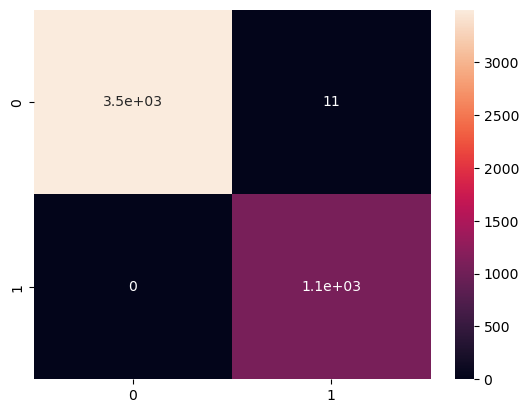

In [86]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

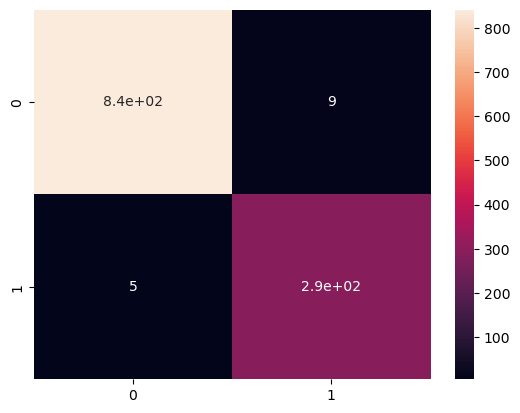

In [87]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [88]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       850
           1       0.97      0.98      0.98       296

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



In [89]:
spamham_countvectorizer

<5728x37229 sparse matrix of type '<class 'numpy.int64'>'
	with 565908 stored elements in Compressed Sparse Row format>

In [90]:
from sklearn.feature_extraction.text import TfidfTransformer

emails_tfidf = TfidfTransformer().fit_transform(spamham_countvectorizer)
print(emails_tfidf.shape)

(5728, 37229)


In [91]:
print(emails_tfidf[:,:])
# Sparse matrix with all the values of IF-IDF

  (0, 36565)	0.06908944889543289
  (0, 36432)	0.06757047739651872
  (0, 36430)	0.059679365326344706
  (0, 36025)	0.1319392730989776
  (0, 35034)	0.05233428188145157
  (0, 34800)	0.09384305652743173
  (0, 33562)	0.06921203533637368
  (0, 33037)	0.09490328795519132
  (0, 32843)	0.06073679014431701
  (0, 32617)	0.11152518721878715
  (0, 32602)	0.11962021118089677
  (0, 32319)	0.11962021118089677
  (0, 32263)	0.0789584619498058
  (0, 31968)	0.11850864343422601
  (0, 31959)	0.08499360588016656
  (0, 31547)	0.10454173100334828
  (0, 30218)	0.04607380847274443
  (0, 29858)	0.09333645170409068
  (0, 28879)	0.07691781511072393
  (0, 28266)	0.09213153238881405
  (0, 28110)	0.11014658587128429
  (0, 27986)	0.06591875520600377
  (0, 27225)	0.0732875367149963
  (0, 27224)	0.05761542024424838
  (0, 27122)	0.11082209685254277
  :	:
  (5727, 7921)	0.04309622276800823
  (5727, 7842)	0.09382800880629484
  (5727, 7841)	0.08777996676891853
  (5727, 5729)	0.5517795052228944
  (5727, 5629)	0.023897736992445

<Axes: >

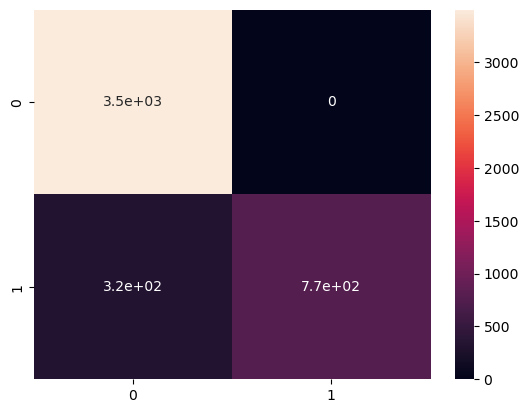

In [92]:
X = emails_tfidf
y = label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [93]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       863
           1       0.28      0.29      0.28       283

    accuracy                           0.64      1146
   macro avg       0.52      0.52      0.52      1146
weighted avg       0.64      0.64      0.64      1146

